In [96]:
import os
import soundfile as sf
import numpy as np
import random
import matplotlib.pyplot as plt
from audiotools import AudioSignal
from audiotools.data.datasets import AudioDataset, AudioLoader
from torch.utils.data import DataLoader
from torchaudio import functional as F


In [80]:
from torchaudio.pipelines import SQUIM_OBJECTIVE, SQUIM_SUBJECTIVE
subjective_model = SQUIM_SUBJECTIVE.get_model()
objective_model = SQUIM_OBJECTIVE.get_model()

In [81]:
dataset = AudioDataset(AudioLoader(sources=["./audio_files/"], shuffle=False),n_examples=3, sample_rate=44100, duration = 0.5)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True, collate_fn=dataset.collate, pin_memory=True)

In [89]:
signals = next(iter(dataloader))["signal"].audio_data
signals.shape

torch.Size([3, 1, 22050])

In [95]:
signals_resample = F.resample(signals, 44100, 16000)

In [94]:
objective_model(signals_resample.squeeze(1))

[tensor([0.8573, 0.9805, 0.9637], grad_fn=<SqueezeBackward1>),
 tensor([1.1302, 3.2568, 3.5895], grad_fn=<SqueezeBackward1>),
 tensor([ 5.0125, 24.3178, 15.4249], grad_fn=<SqueezeBackward1>)]

In [2]:
clean_path = "./clean_e0b2300.wav"
noisy_path = "./noisy_e0b2300.wav"
recon_path = "./recons_e0b2300.wav"
sr = 44100
clean, _ = sf.read(clean_path)
noisy, _ = sf.read(noisy_path)
recon, _ = sf.read(recon_path)

In [59]:
import torchaudio
from torchaudio import functional as F
clean_tensor, _ = torchaudio.load(clean_path)
clean_tensor = F.resample(clean_tensor[0], sr, 16000)
recon_tensor, _ = torchaudio.load(recon_path)
#recon_tensor = F.resample(recon_tensor[0], sr, 16000)
noisy_tensor, _ = torchaudio.load(noisy_path)
#noisy_tensor = F.resample(noisy_tensor[0], sr, 16000)
#subjective_model(clean_tensor, recon_tensor)
objective_model(recon_tensor)

[tensor([0.9457], grad_fn=<SqueezeBackward1>),
 tensor([2.8709], grad_fn=<SqueezeBackward1>),
 tensor([23.2730], grad_fn=<SqueezeBackward1>)]

<Figure size 3000x3000 with 0 Axes>

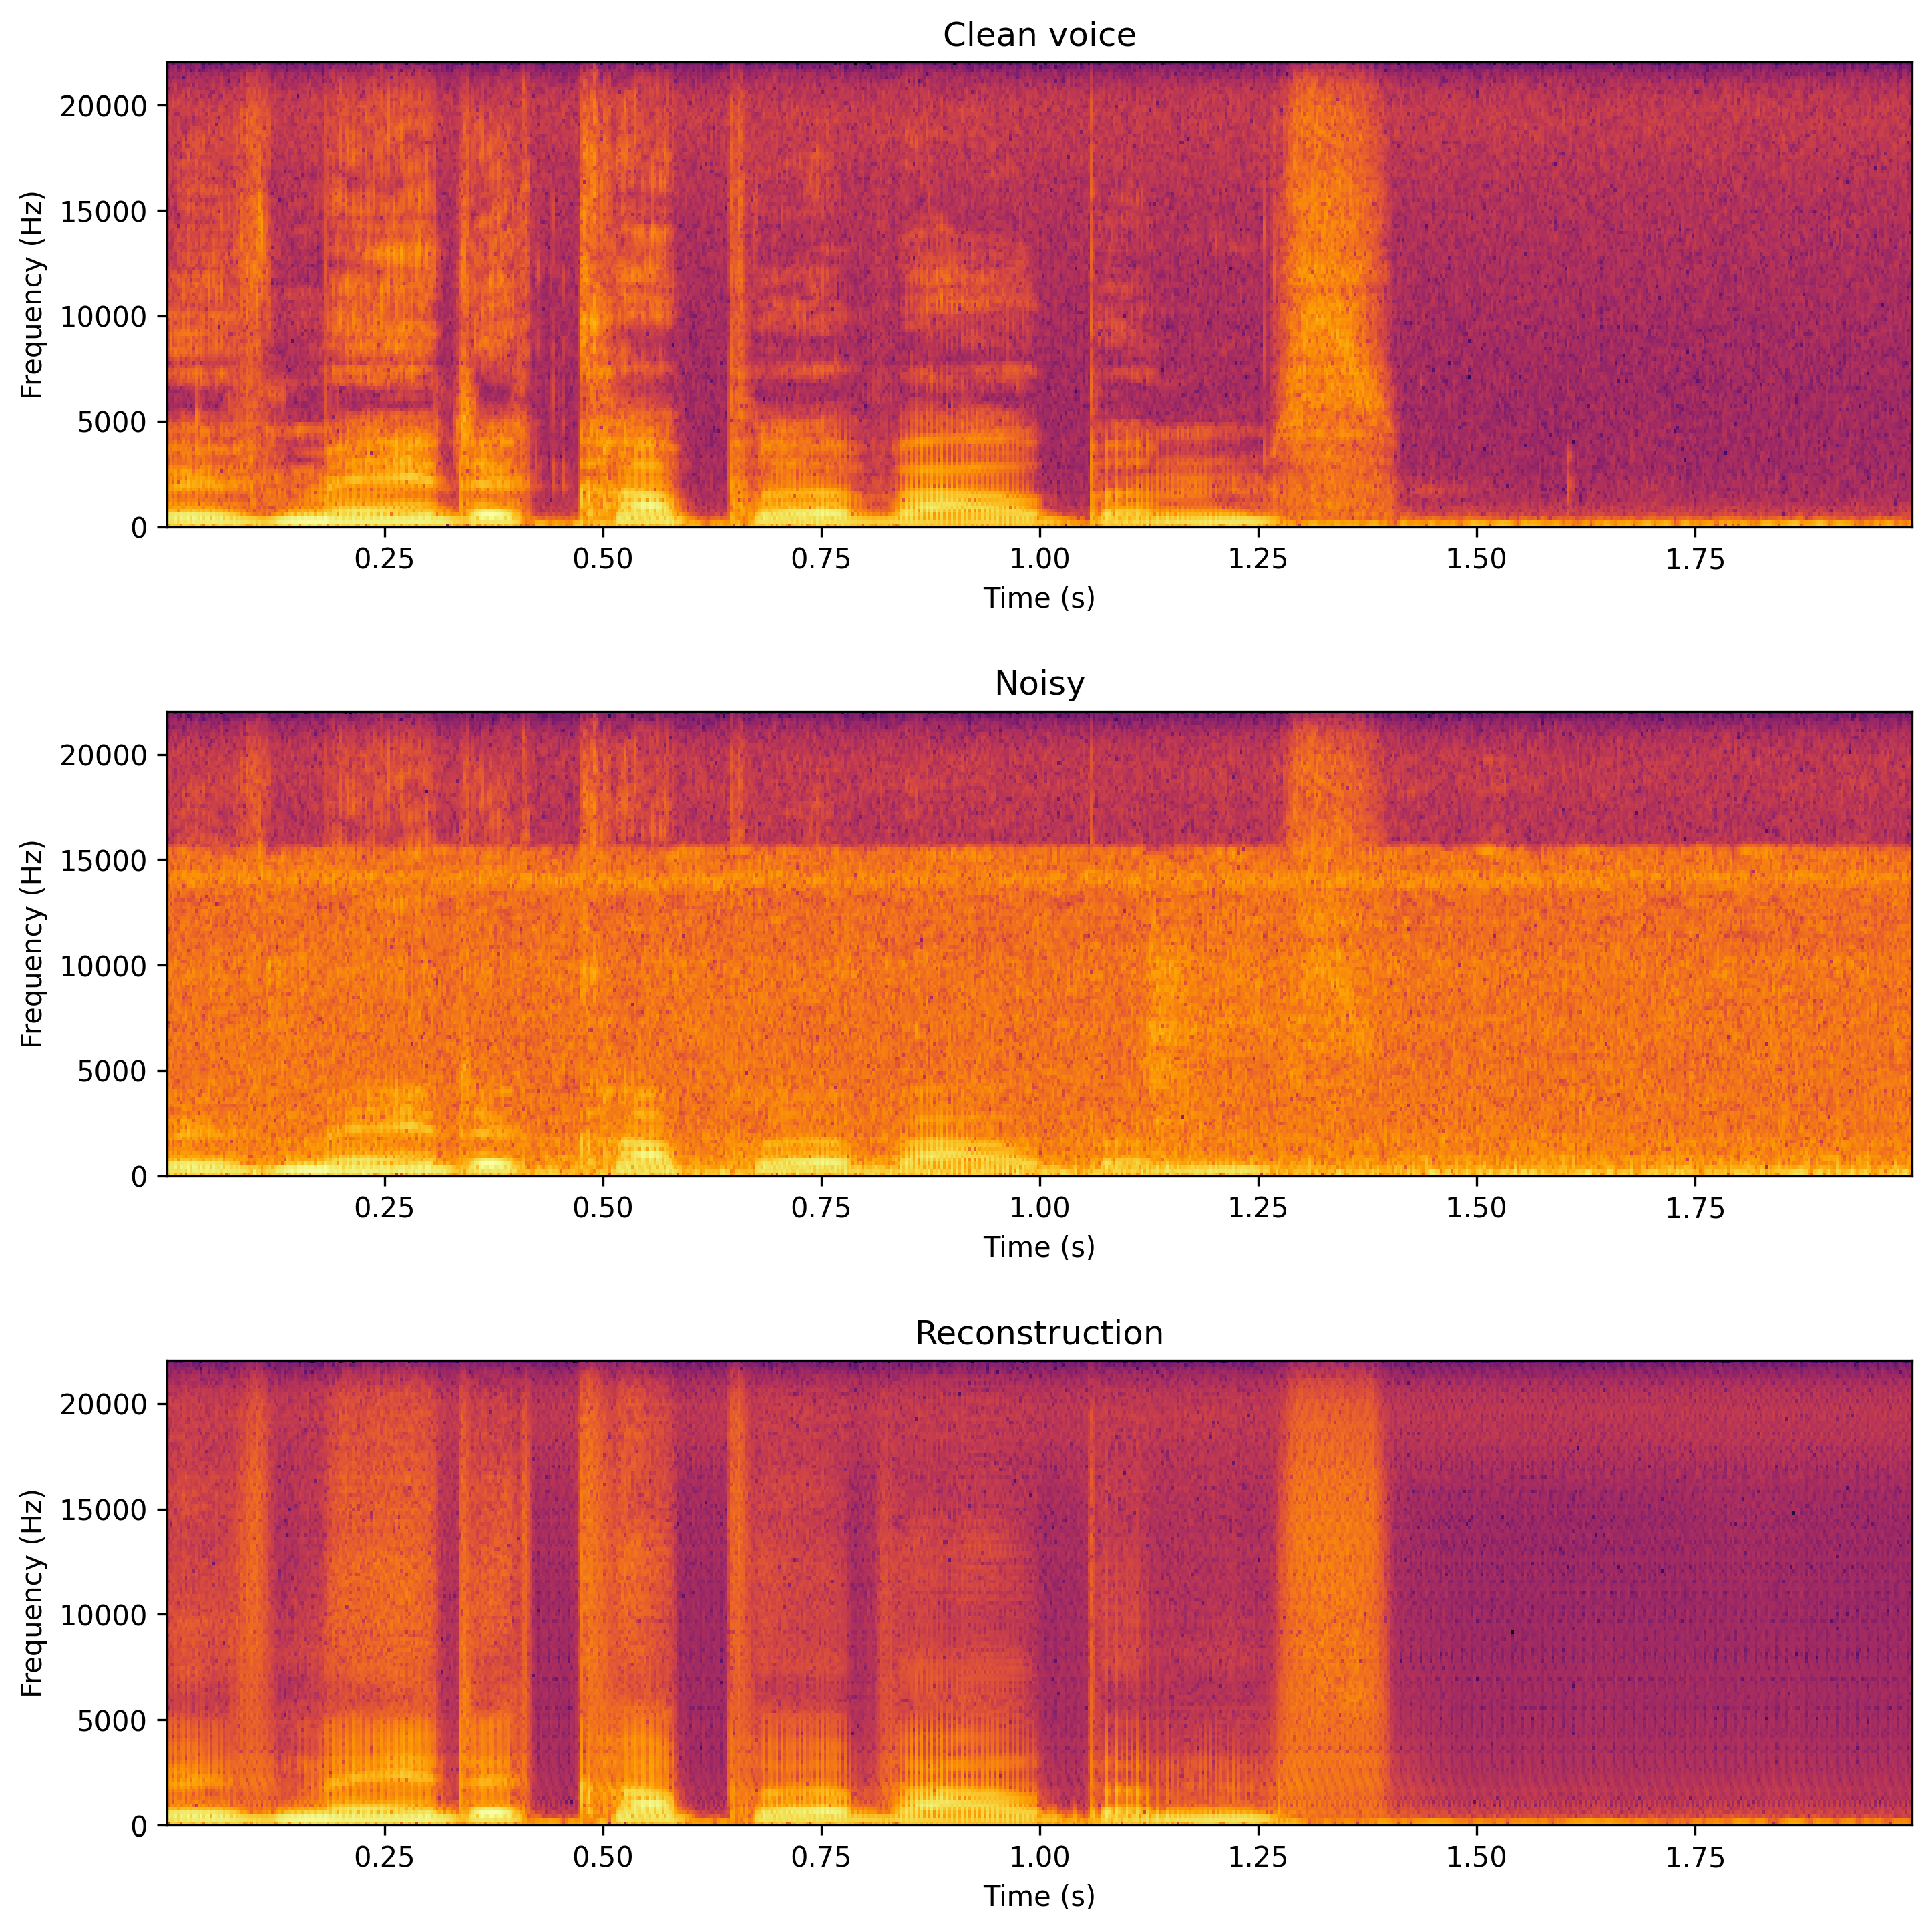

In [11]:
import os
import soundfile as sf
import numpy as np
import random
import matplotlib.pyplot as plt

clean_path = "./clean_e0b2300.wav"
noisy_path = "./noisy_e0b2300.wav"
recon_path = "./recons_e0b2300.wav"
sr = 44100
clean, _ = sf.read(clean_path)
noisy, _ = sf.read(noisy_path)
recon, _ = sf.read(recon_path)

plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(10, 10))  

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Clean signal
ax[0].set_title("Clean voice")
ax[0].specgram(clean[sr:3*sr], Fs=sr, cmap="inferno")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Frequency (Hz)")

# Noisy signal
ax[1].set_title("Noisy")
ax[1].specgram(noisy[sr:3*sr], Fs=sr, cmap="inferno")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Frequency (Hz)")

# Reconstructed signal
ax[2].set_title("Reconstruction")
ax[2].specgram(recon[sr:3*sr], Fs=sr, cmap="inferno")
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Frequency (Hz)")

plt.tight_layout(pad=2.0) 
plt.show()

<Figure size 4500x3000 with 0 Axes>

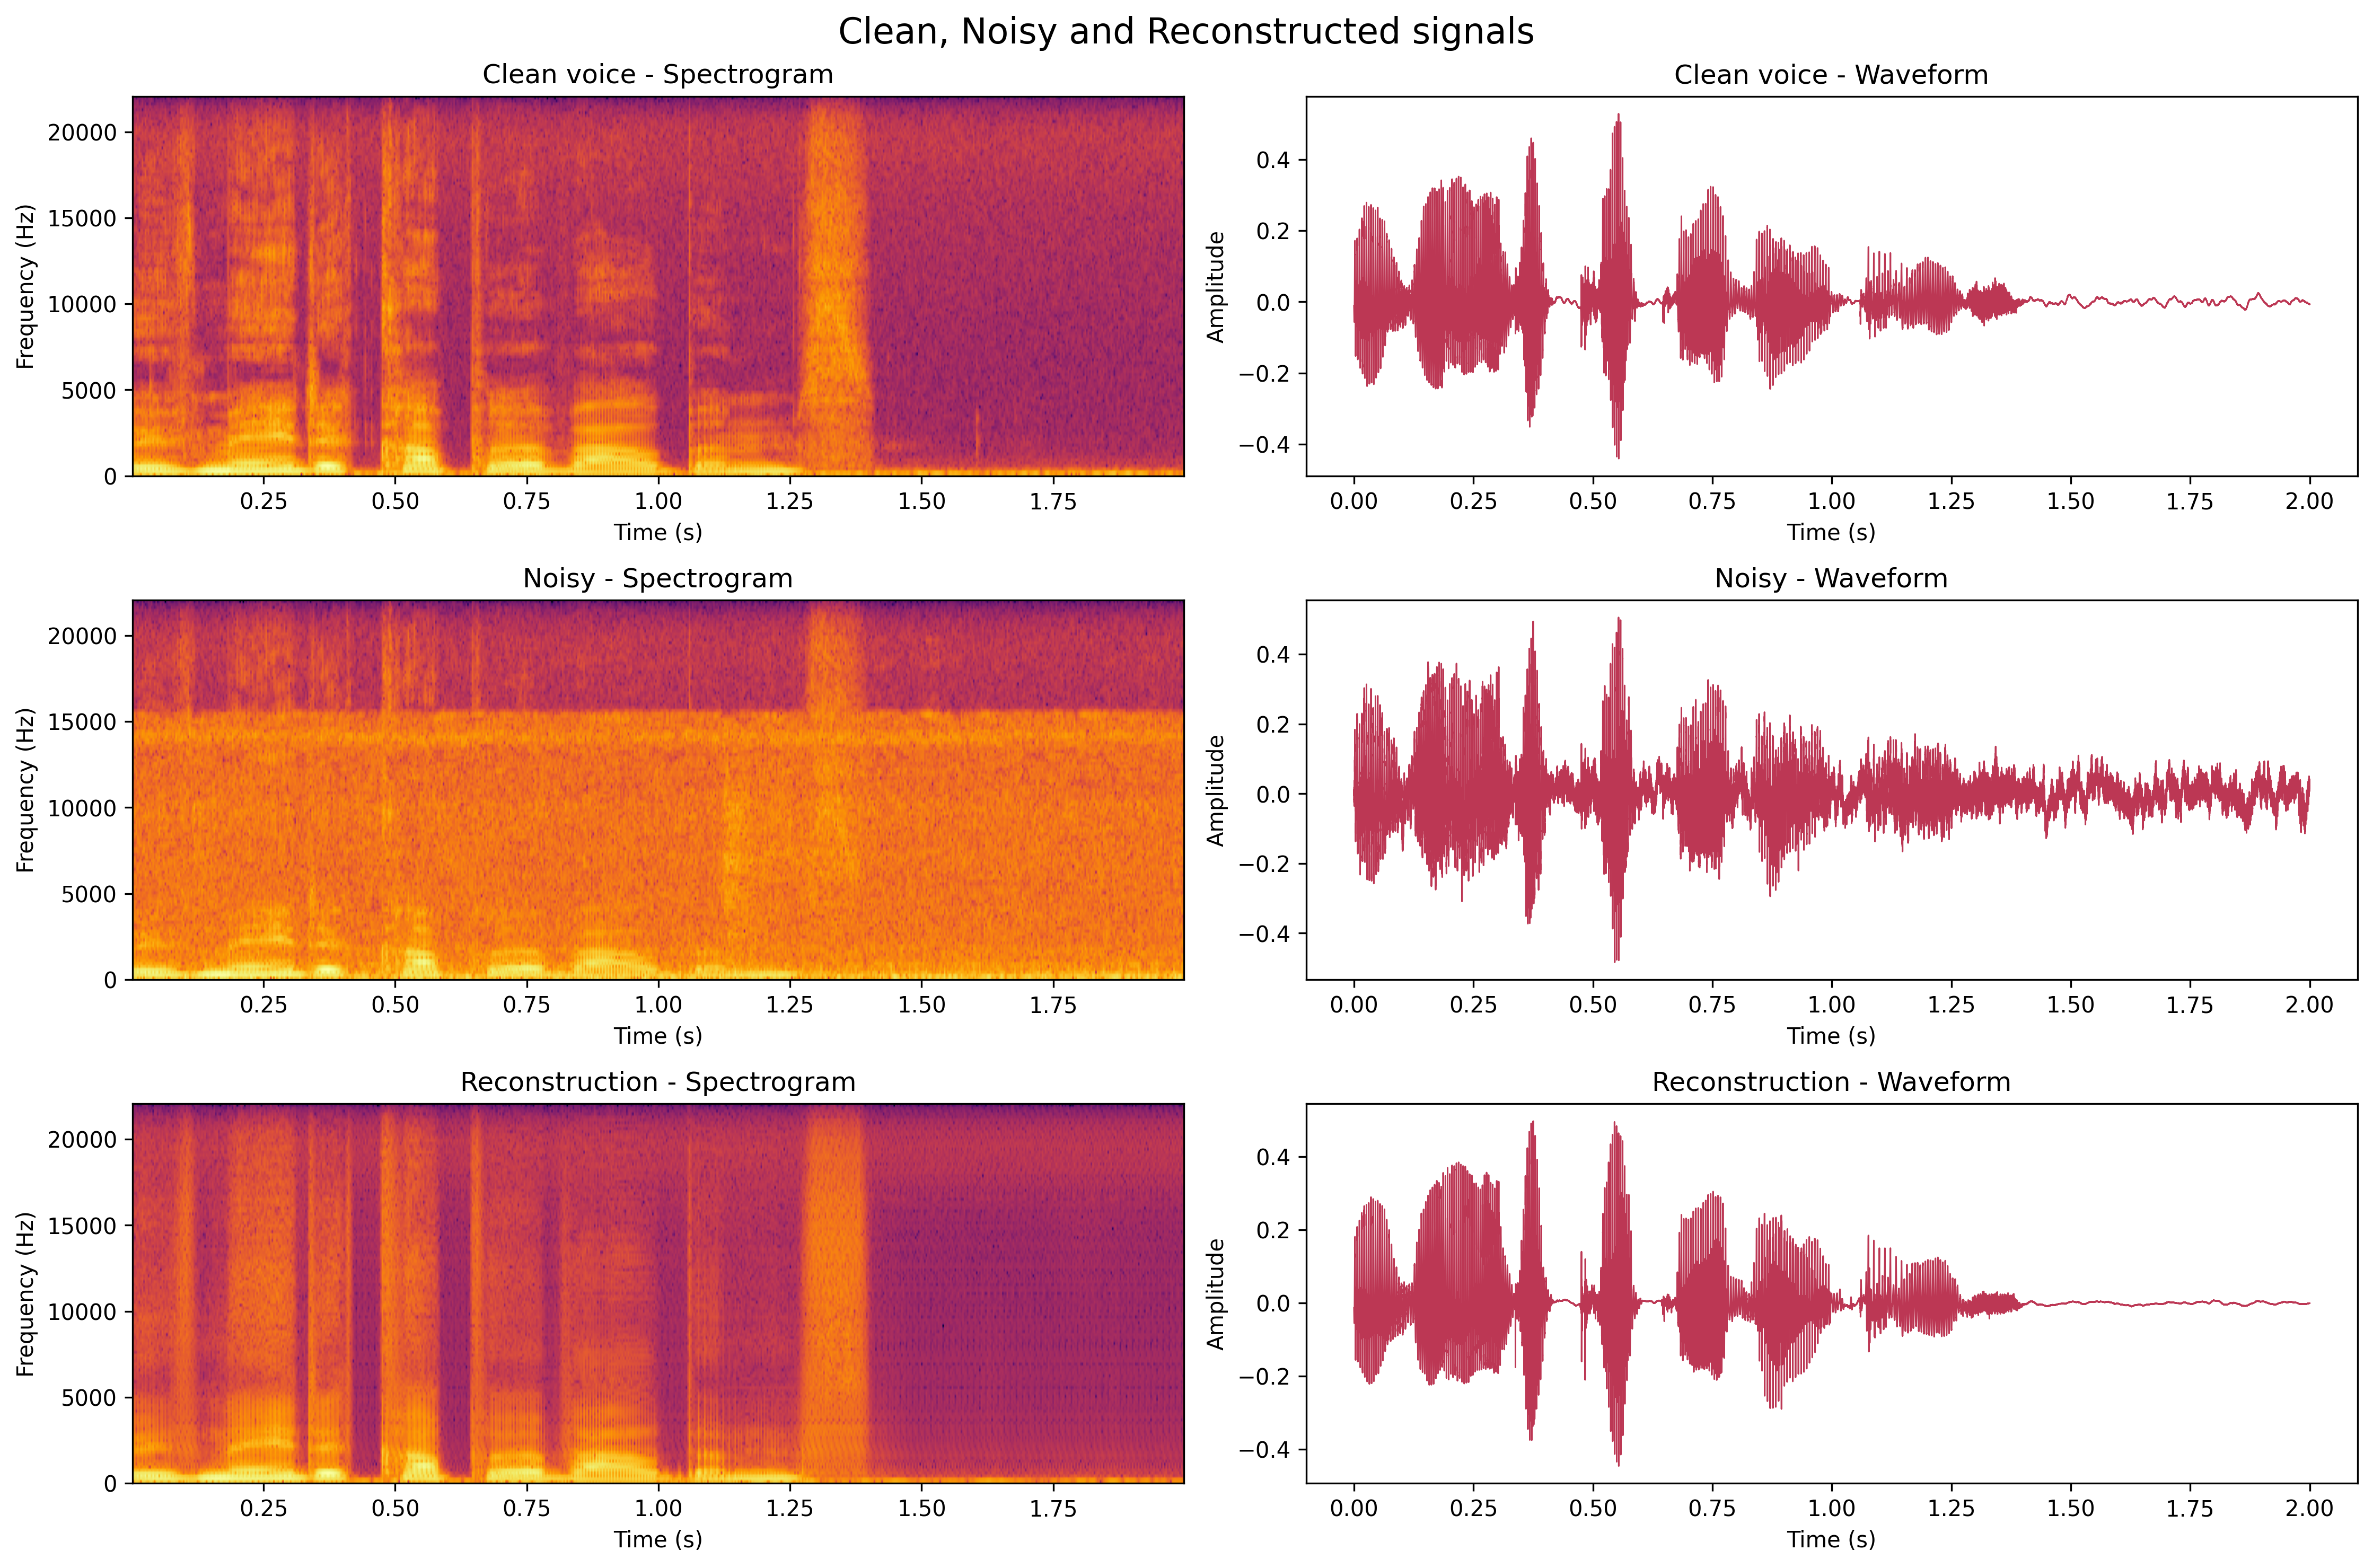

In [44]:

plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(15, 10))

t = np.linspace(0, 2, sr*2)

# Creating a figure with 3 rows and 2 columns for subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

cmap = plt.get_cmap('inferno')
representative_color = cmap(0.5)

# title
fig.suptitle("Clean, Noisy and Reconstructed signals", fontsize=16)

# Clean signal - Spectrogram
ax[0, 0].set_title("Clean voice - Spectrogram")
ax[0, 0].specgram(clean[sr:3*sr], Fs=sr, cmap=cmap)
ax[0, 0].set_xlabel("Time (s)")
ax[0, 0].set_ylabel("Frequency (Hz)")

# Clean signal - Waveform
ax[0, 1].set_title("Clean voice - Waveform")
ax[0, 1].plot(t, clean[sr:3*sr], color=representative_color, linewidth=0.7)
ax[0, 1].set_xlabel("Time (s)")
ax[0, 1].set_ylabel("Amplitude")

# Noisy signal - Spectrogram
ax[1, 0].set_title("Noisy - Spectrogram")
ax[1, 0].specgram(noisy[sr:3*sr], Fs=sr, cmap=cmap)
ax[1, 0].set_xlabel("Time (s)")
ax[1, 0].set_ylabel("Frequency (Hz)")

# Noisy signal - Waveform
ax[1, 1].set_title("Noisy - Waveform")
ax[1, 1].plot(t, noisy[sr:3*sr], color=representative_color, linewidth=0.7)
ax[1, 1].set_xlabel("Time (s)")
ax[1, 1].set_ylabel("Amplitude")

# Reconstructed signal - Spectrogram
ax[2, 0].set_title("Reconstruction - Spectrogram")
ax[2, 0].specgram(recon[sr:3*sr], Fs=sr, cmap=cmap)
ax[2, 0].set_xlabel("Time (s)")
ax[2, 0].set_ylabel("Frequency (Hz)")

# Reconstructed signal - Waveform
ax[2, 1].set_title("Reconstruction - Waveform")
ax[2, 1].plot(t, recon[sr:3*sr], color=representative_color, linewidth=0.7)
ax[2, 1].set_xlabel("Time (s)")
ax[2, 1].set_ylabel("Amplitude")

plt.tight_layout(pad=1.0) 
plt.show()

<Figure size 1000x1000 with 0 Axes>

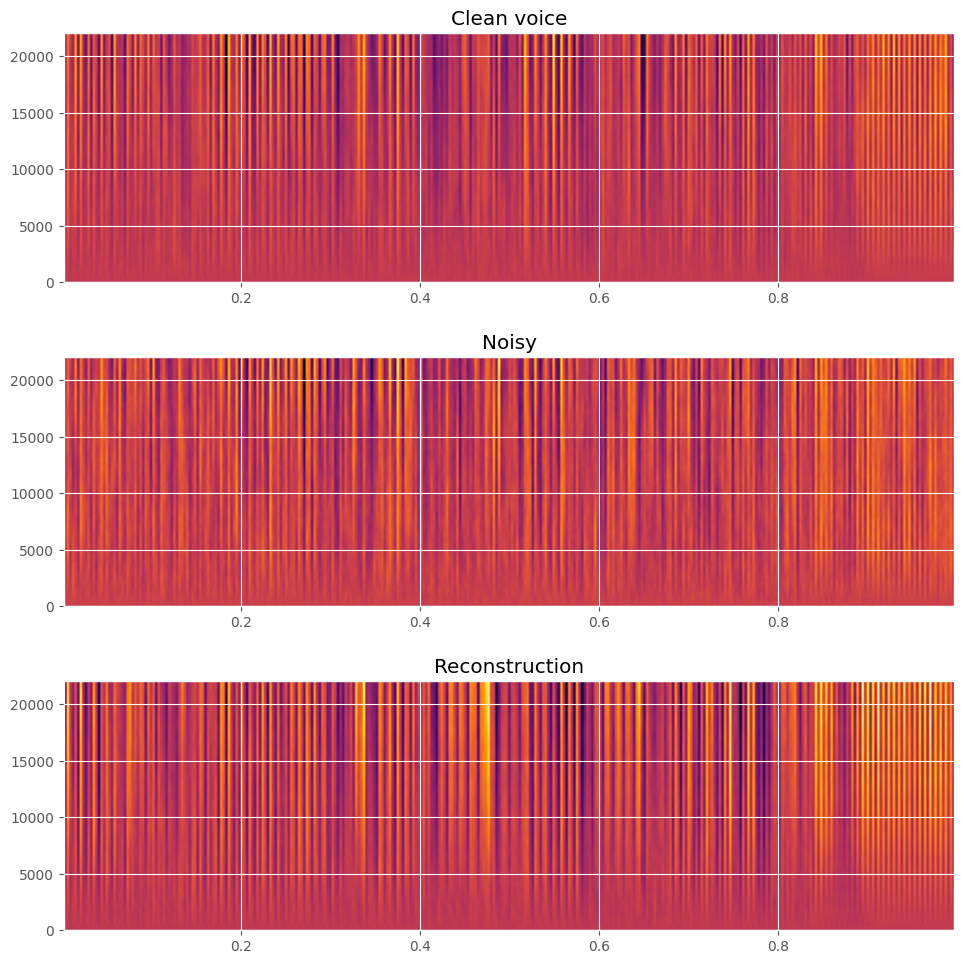

In [46]:
plt.figure(figsize=(10, 10))  

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Clean signal
ax[0].set_title("Clean voice")
ax[0].specgram(clean[sr:2*sr], Fs=sr, cmap="inferno", mode="phase")

# Noisy signal
ax[1].set_title("Noisy")
ax[1].specgram(noisy[sr:2*sr], Fs=sr, cmap="inferno", mode="phase")

# Reconstructed signal
ax[2].set_title("Reconstruction")
ax[2].specgram(recon[sr:2*sr], Fs=sr, cmap="inferno", mode="phase")

plt.tight_layout(pad=2.0) 
plt.show()